# Data-Driven Employee Retention: An Attrition Prediction Model

### 1) Introduction

Employee attrition prediction is crucial for HR departments to retain valuable talent and reduce costs. 
This notebook builds a predictive model to determine if an employee is likely to leave the company 
based on various features like age, salary, department, and experience.

##### We employ multiple classification algorithms including Random Forest, Decision Tree, and Logistic Regression. The models are evaluated on accuracy and other performance metrics. We also perform hyperparameter tuning using GridSearchCV to optimize model performance.

### 2) Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### 3) Loading CSV file

In [2]:
df = pd.read_csv(r"employee_attrition_dataset.csv")  
df.tail(8)

,Age,Salary,Department,Experience,Left company
1192,23.0,69230.0,IT,0.0,0
1193,57.0,93616.0,Marketing,37.0,0
1194,50.0,27099.0,Sales,31.0,0
1195,58.0,45431.0,Sales,38.0,0
1196,54.0,76492.0,IT,34.0,0
1197,32.0,116722.0,HR,10.0,0
1198,39.0,67684.0,Marketing,17.0,0
1199,57.0,50111.0,HR,35.0,0


In [3]:
df.tail(10)

,Age,Salary,Department,Experience,Left company
1190,59.0,71399.0,Marketing,38.0,0
1191,55.0,43472.0,HR,31.0,0
1192,23.0,69230.0,IT,0.0,0
1193,57.0,93616.0,Marketing,37.0,0
1194,50.0,27099.0,Sales,31.0,0
1195,58.0,45431.0,Sales,38.0,0
1196,54.0,76492.0,IT,34.0,0
1197,32.0,116722.0,HR,10.0,0
1198,39.0,67684.0,Marketing,17.0,0
1199,57.0,50111.0,HR,35.0,0


#### Check the number of rows and columns

In [4]:
df.shape

(1200, 5)

### 4) Data Cleaning and Preprocessing

#### 4.1) Calculating total NaN values

In [5]:
df.isnull().sum()

Age             5
Salary          8
Department      6
Experience      4
Left company    0
dtype: int64

#### 4.2) Checking duplicate rows

In [6]:
 df.duplicated().sum()

0

#### 4.3) Fill NaN Values by suitable Values

In [7]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
df['Experience'] = df['Experience'].fillna(df['Experience'].mean())
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])

#### 4.4) Recheck for NaN values 

In [8]:
df.isnull().sum()

Age             0
Salary          0
Department      0
Experience      0
Left company    0
dtype: int64

In [9]:
df.columns

Index(['Age', 'Salary', 'Department', 'Experience', 'Left company'], dtype='object')

#### 4.5) Statistical data of the dataframe

In [10]:
df.describe()

,Age,Salary,Experience,Left company
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,40.551464,70183.725671,19.668896,0.229167
std,11.454504,28546.383424,11.439834,0.420472
min,21.000000,20163.000000,0.000000,0.000000
25%,30.000000,46549.500000,9.000000,0.000000
50%,41.000000,69754.500000,20.000000,0.000000
75%,50.000000,94580.500000,30.000000,0.000000
max,59.000000,119986.000000,41.000000,1.000000


#### 4.6) Encoding categorical data

In [11]:
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])

In [12]:
print("Category Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Category Mapping: {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4}


In [13]:
df.head(10)

,Age,Salary,Department,Experience,Left company
0,59.0,89626.0,3,41.0,0
1,49.0,26960.0,4,30.0,1
2,35.0,55772.0,0,17.0,0
3,28.0,41520.0,0,9.0,0
4,41.0,69481.0,4,21.0,0
5,59.0,56408.0,2,37.0,0
6,39.0,114006.0,4,19.0,0
7,43.0,77134.0,0,23.0,0
8,31.0,40491.0,2,9.0,0
9,31.0,21341.0,2,9.0,0


## 5) Exploratory Data Analysis (EDA)

### 5.1) Line Graph

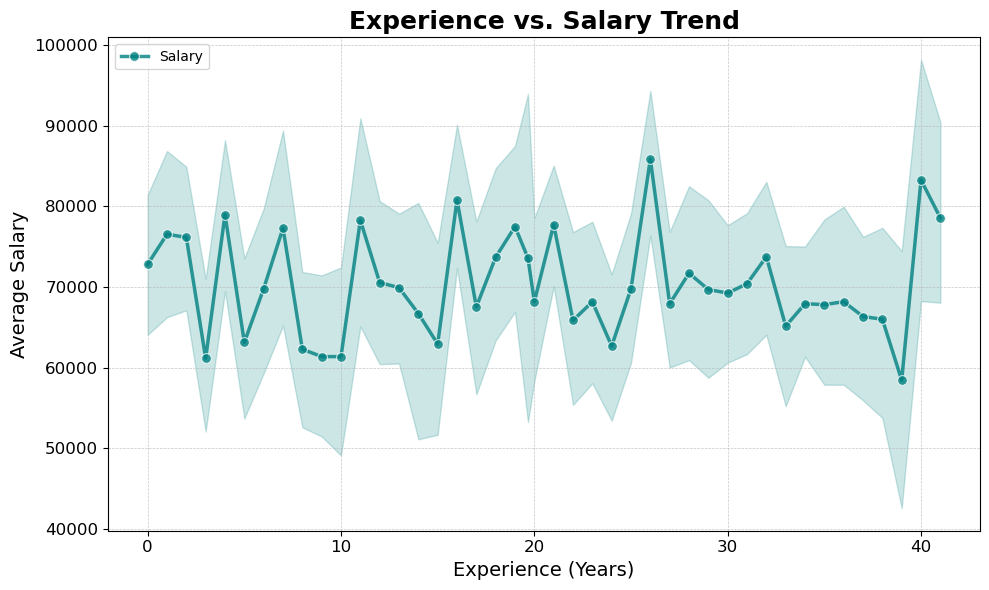

In [14]:
plt.figure(figsize=(10, 6))
df_sorted = df.sort_values(by='Experience')
sns.lineplot(
    x='Experience',
    y='Salary',
    data=df_sorted,
    color='teal',
    marker='o',
    linewidth=2.5,
    markersize=7,
    alpha=0.8
)
plt.title('Experience vs. Salary Trend', fontsize=18, fontweight='bold')
plt.xlabel('Experience (Years)', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["Salary"])
plt.tight_layout()
plt.show()

### 5.2) Histograms

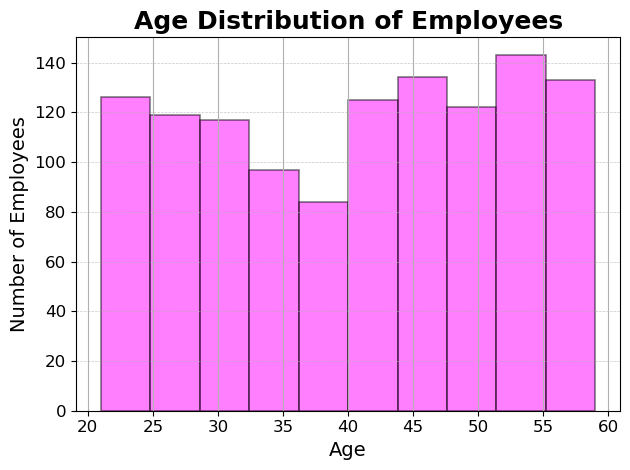

In [15]:
df['Age'].hist(
    bins=10,                      
    color='Magenta',             
    edgecolor='black',
    linewidth=1.2, alpha=0.5
)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Number of Employees", fontsize=14)
plt.title("Age Distribution of Employees", fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

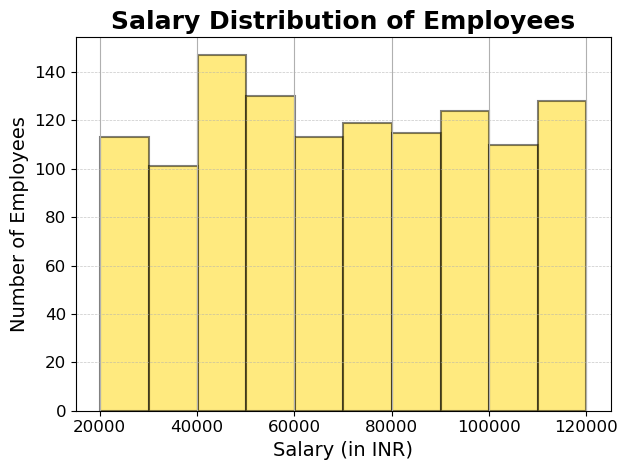

In [16]:
df['Salary'].hist(
    bins=10,                        
    color='gold',                  
    edgecolor='black',
    linewidth=1.5, alpha=0.5
)

plt.xlabel("Salary (in INR)", fontsize=14)
plt.ylabel("Number of Employees", fontsize=14)
plt.title("Salary Distribution of Employees", fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


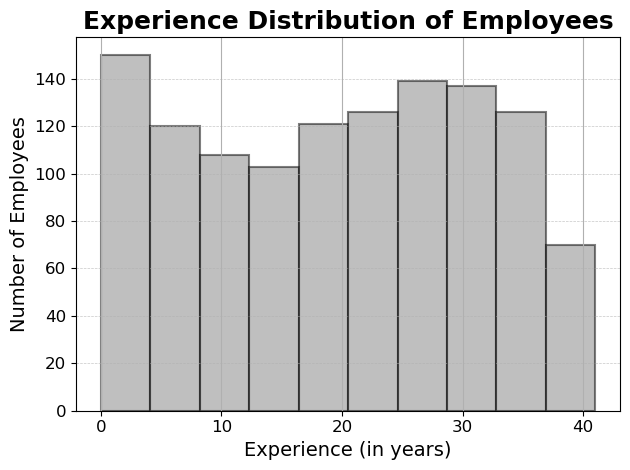

In [17]:
df['Experience'].hist(
    bins=10,                        
    color='grey',                 
    edgecolor='black',
    linewidth=1.5,alpha=0.5
)

plt.xlabel("Experience (in years)", fontsize=14)
plt.ylabel("Number of Employees", fontsize=14)
plt.title("Experience Distribution of Employees", fontsize=18, fontweight='bold')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()



### 5.3) Boxplot (For outliers and median value)

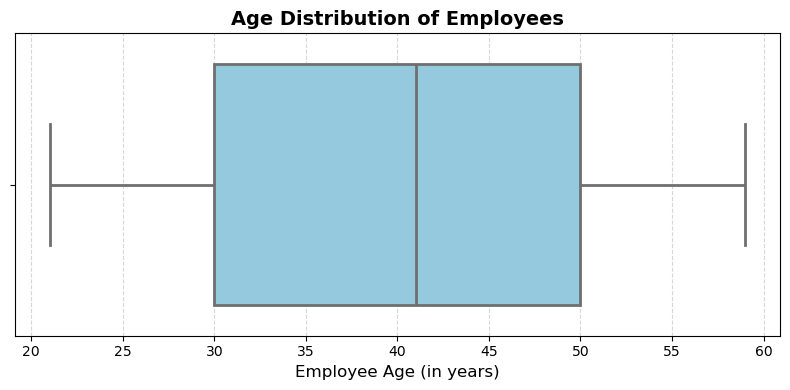

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'], color='skyblue', linewidth=2, fliersize=5)
plt.xlabel("Employee Age (in years)", fontsize=12)
plt.title("Age Distribution of Employees", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
plt.savefig("boxplot_age.png", dpi=300, bbox_inches='tight')


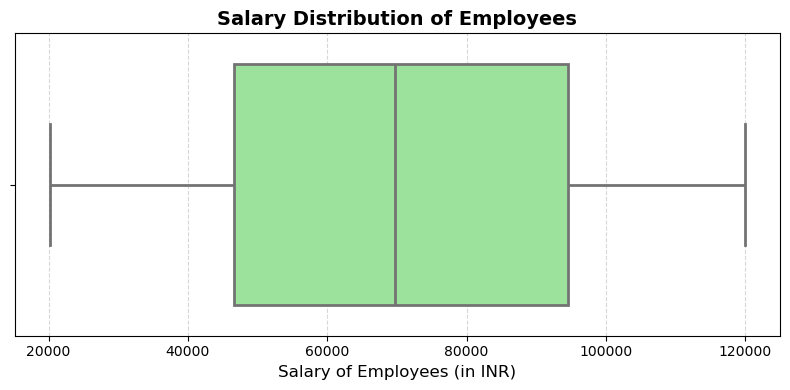

In [19]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Salary'], color='lightgreen', linewidth=2, fliersize=5)
plt.xlabel("Salary of Employees (in INR)", fontsize=12)
plt.title("Salary Distribution of Employees", fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 5.4) Countplot

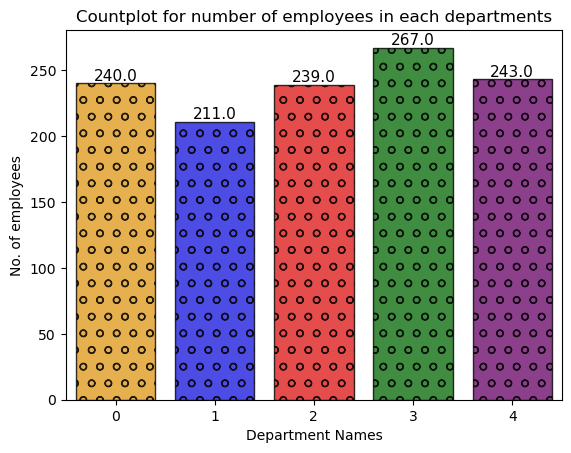

In [20]:
ax=sns.countplot(x=df['Department'],
                data=df,
                edgecolor="black",
                palette=['orange','blue',   'red','green', 'purple'],
                hatch="o",
                hue="Department",
                legend=False,
                alpha=0.8)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.xlabel("Department Names")
plt.ylabel("No. of employees")
plt.title("Countplot for number of employees in each departments")
plt.show()

### 5.5) Bargraph

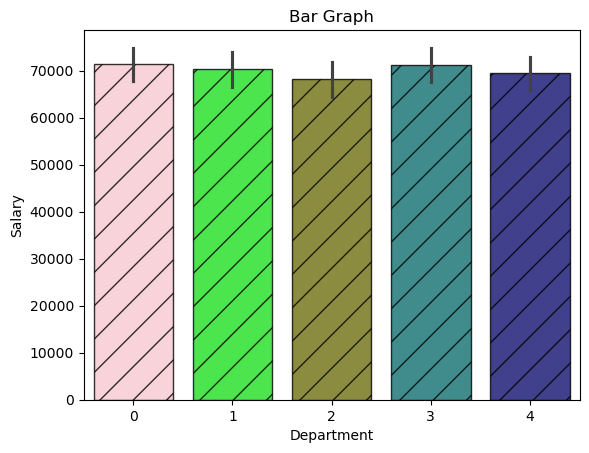

In [21]:
sns.barplot(
    x='Department',
    y='Salary',
    data=df,
    edgecolor="black",
    palette=['pink', 'lime', 'olive', 'teal', 'navy'],
    hatch="/",
    hue="Department",
    legend=False,
    alpha=0.8
)
plt.title("Bar Graph")
plt.show()


### 5.6) Scatterplot

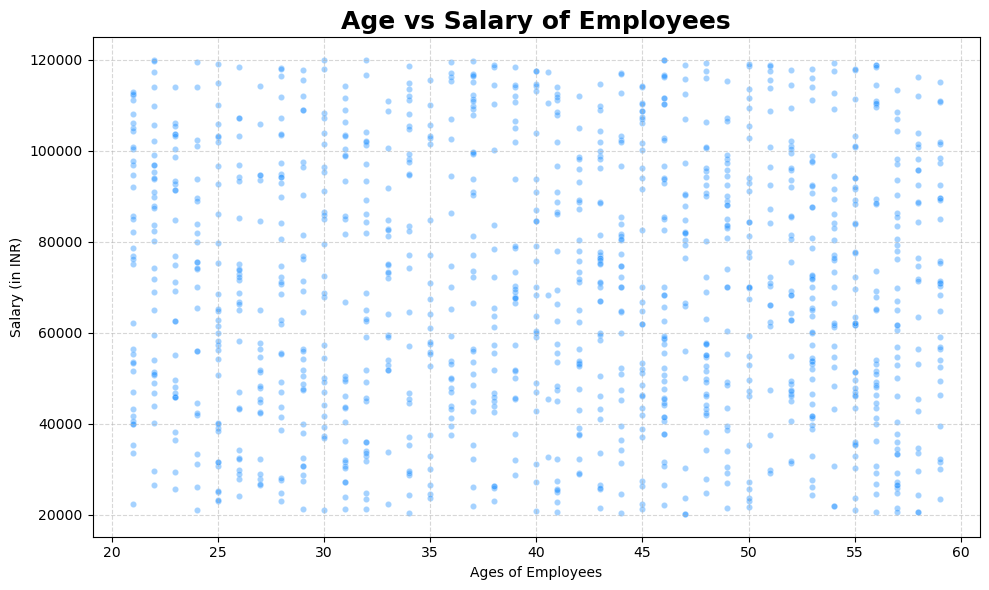

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['Age'], 
    df['Salary'], 
    alpha=0.4,             
    s=20,                
    c='dodgerblue',        
    edgecolors='w',     
    linewidth=0.3
)

plt.xlabel("Ages of Employees")
plt.ylabel("Salary (in INR)")
plt.title("Age vs Salary of Employees", fontsize=18, fontweight='bold')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 5.7) Pair plot


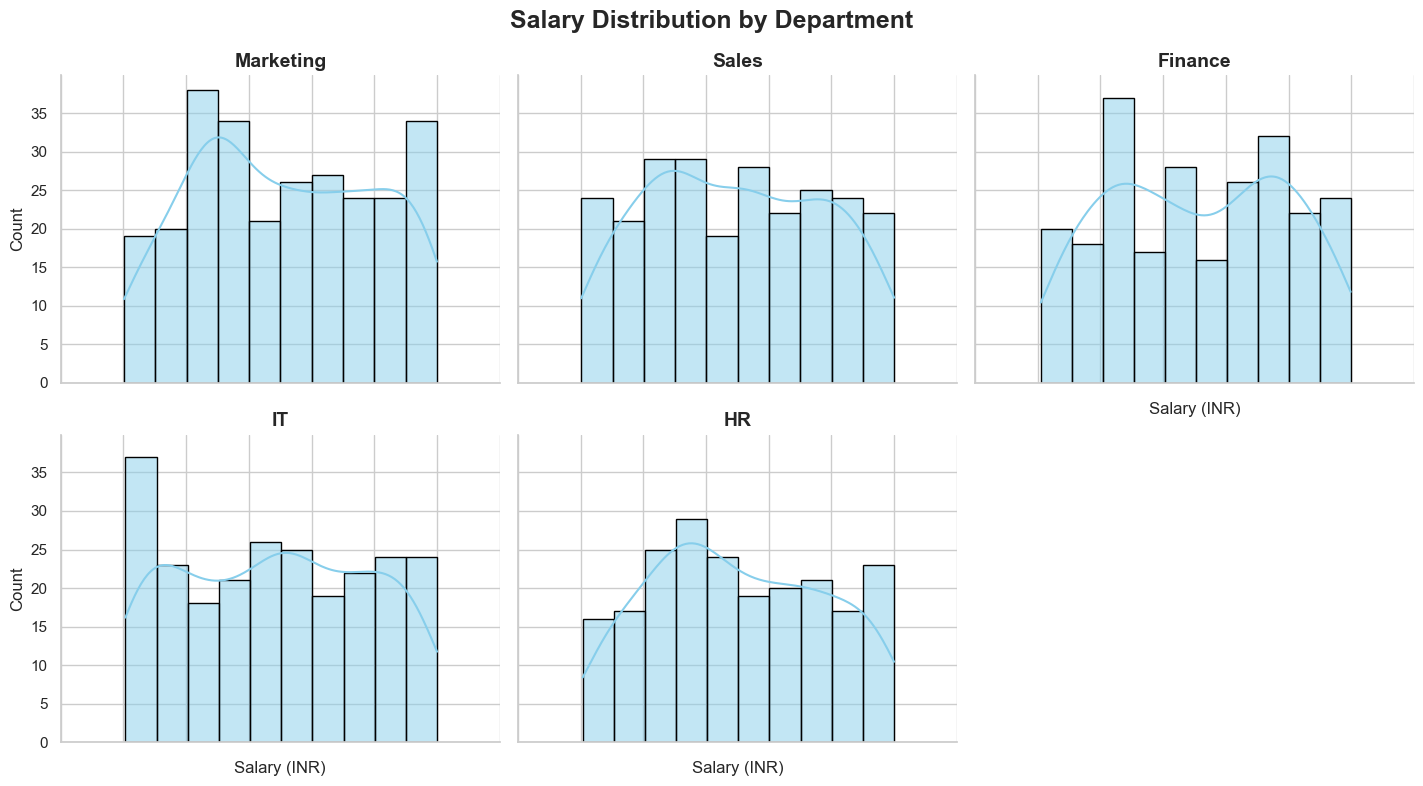

In [23]:
df_plot = df.copy()
df_plot['Department'] = le.inverse_transform(df['Department'])
sns.set(style="whitegrid")
g = sns.FacetGrid(df_plot, col="Department", col_wrap=3, height=4, aspect=1.2)
g.map(sns.histplot, "Salary", kde=True, bins=10, color='skyblue', edgecolor='black', linewidth=1)
g.set_titles(col_template="{col_name}", size=14, fontweight='bold')
g.set_axis_labels("Salary (INR)", "Count", fontsize=12)
g.set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Salary Distribution by Department", fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()



### 5.8) Heatmap for visualisation


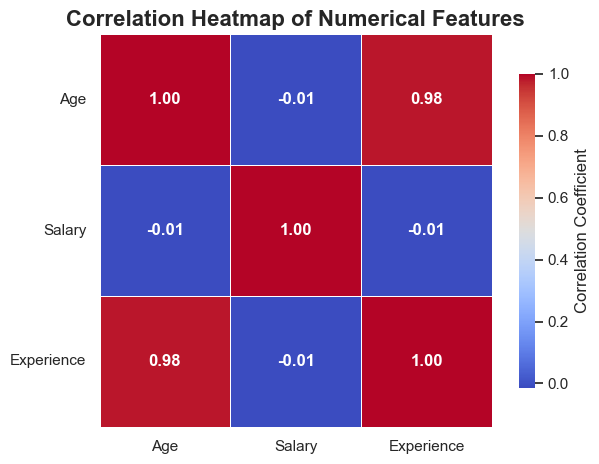

In [24]:
sns.heatmap(
    df[['Age', 'Salary', 'Experience']].corr(numeric_only=True),
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True,
    annot_kws={"size": 12, "weight": "bold"},
    cbar_kws={'shrink': .8, 'label': 'Correlation Coefficient'}
)

plt.xticks(fontsize=11, rotation=0)
plt.yticks(fontsize=11, rotation=0)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


### 5.9) Voilinplot

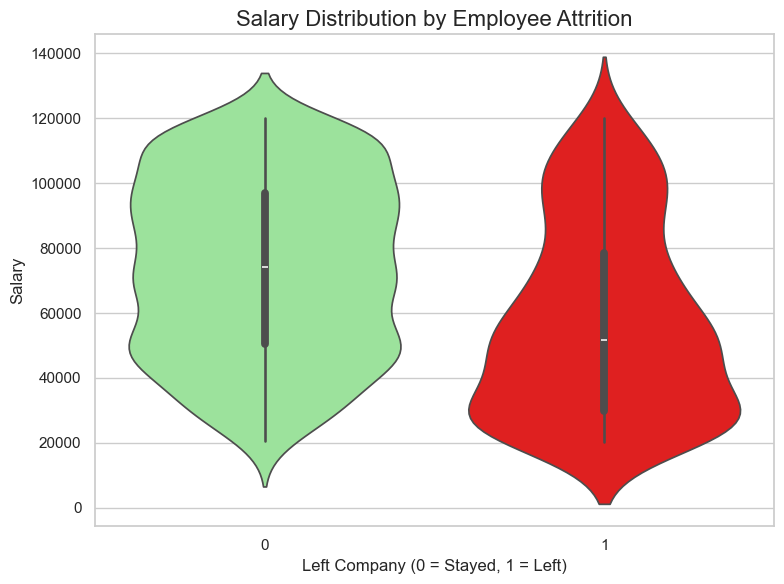

In [25]:
plt.figure(figsize=(8, 6))

sns.violinplot(
    x='Left company',
    y='Salary',
    data=df,
    palette={0: 'LightGreen', 1: 'Red'},
    order=['0', '1'],
    hue='Left company',  
    legend=False,
    inner='box'
)
plt.title('Salary Distribution by Employee Attrition', fontsize=16)
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

### 5.10) Swarmplot

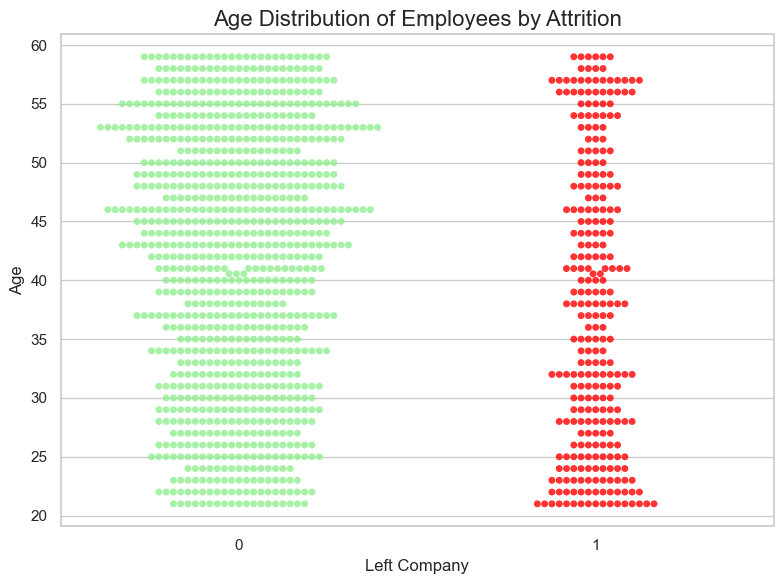

In [26]:
plt.figure(figsize=(8, 6))
sns.swarmplot(
    x='Left company',
    y='Age',
    data=df,
    hue='Left company',             
    palette={0: 'LightGreen', 1: 'Red'},
    legend=False,
    order=['0', '1'],
    size=5,
    alpha=0.8
)
plt.title('Age Distribution of Employees by Attrition', fontsize=16)
plt.xlabel('Left Company')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

# 6) Train Model on different Algorithms

In [27]:
X = df.drop('Left company', axis=1)
y = df['Left company']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: Logistic Regression
Logistic Regression is a statistical method for binary classification. 
It estimates the probability of a binary outcome using a sigmoid function.

In [28]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(max_iter=1000)

logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy Score:", accuracy_score(y_test, y_pred_logreg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Results:
Accuracy Score: 0.7833333333333333

Confusion Matrix:
 [[183   1]
 [ 51   5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.88       184
           1       0.83      0.09      0.16        56

    accuracy                           0.78       240
   macro avg       0.81      0.54      0.52       240
weighted avg       0.79      0.78      0.71       240



#### Testing upon custom input from user

In [29]:
feature_names = ['Age', 'Salary', 'Department','Experience']
print(" Enter details to predict whether the employee will leave or not:")
print("Department Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

user_input = []
for feature in feature_names:
    val = float(input(f"Enter {feature}: "))
    user_input.append(val)


input_array = pd.DataFrame([user_input], columns=feature_names)


predicted_class = logreg_model.predict(input_array)[0]
predicted_proba = logreg_model.predict_proba(input_array)[0]

print("\n Prediction Result:")
print(f"Predicted Class       : {'Left Company (1)' if predicted_class == 1 else 'Stayed (0)'}")
print(f"Probability of Leaving: {predicted_proba[1]:.2f}")
print(f"Probability of Staying: {predicted_proba[0]:.2f}")


 Enter details to predict whether the employee will leave or not:
Department Mapping: {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4}


Enter Age:  56
Enter Salary:  89000
Enter Department:  2
Enter Experience:  12



 Prediction Result:
Predicted Class       : Stayed (0)
Probability of Leaving: 0.39
Probability of Staying: 0.61


## Model 2: K Nearest Neighbour Algorithm (KNN)
KNN is a non-parametric algorithm that classifies data by a majority vote 
of its neighbors. It is simple and effective for low-dimensional data.

In [30]:

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [31]:

y_pred_knn = knn_model.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       184
           1       0.50      0.32      0.39        56

    accuracy                           0.77       240
   macro avg       0.66      0.61      0.62       240
weighted avg       0.74      0.77      0.75       240

Confusion Matrix:
[[166  18]
 [ 38  18]]
Accuracy: 0.7666666666666667


#### Testing upon custom input from user

In [33]:
feature_names = ['Age', 'Salary', 'Department', 'Experience']
print(" Enter details to predict whether the employee will leave or not:")
print("Department Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

user_input = []
for feature in feature_names:
    val = float(input(f"Enter {feature}: "))
    user_input.append(val)

input_array = pd.DataFrame([user_input], columns=feature_names)

predicted_class = knn_model.predict(input_array)[0]
predicted_proba = knn_model.predict_proba(input_array)[0]

print("\n Prediction Result:")
print(f"Predicted Class       : {'Left Company (1)' if predicted_class == 1 else 'Stayed (0)'}")
print(f"Probability of Leaving: {predicted_proba[1]:.2f}")
print(f"Probability of Staying: {predicted_proba[0]:.2f}")


 Enter details to predict whether the employee will leave or not:
Department Mapping: {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4}


Enter Age:  35
Enter Salary:  60000
Enter Department:  4
Enter Experience:  15



 Prediction Result:
Predicted Class       : Stayed (0)
Probability of Leaving: 0.00
Probability of Staying: 1.00


## Model 3: Random Forest Algorithm
Random Forest is an ensemble method that builds multiple decision trees and merges them
for a more accurate and stable prediction.

In [34]:


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier Results:")
print("Training Accuracy :", rf_model.score(X_train, y_train))
print("Testing Accuracy  :", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Results:
Training Accuracy : 1.0
Testing Accuracy  : 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       184
           1       0.61      0.41      0.49        56

    accuracy                           0.80       240
   macro avg       0.72      0.66      0.68       240
weighted avg       0.78      0.80      0.79       240

Confusion Matrix:
 [[169  15]
 [ 33  23]]


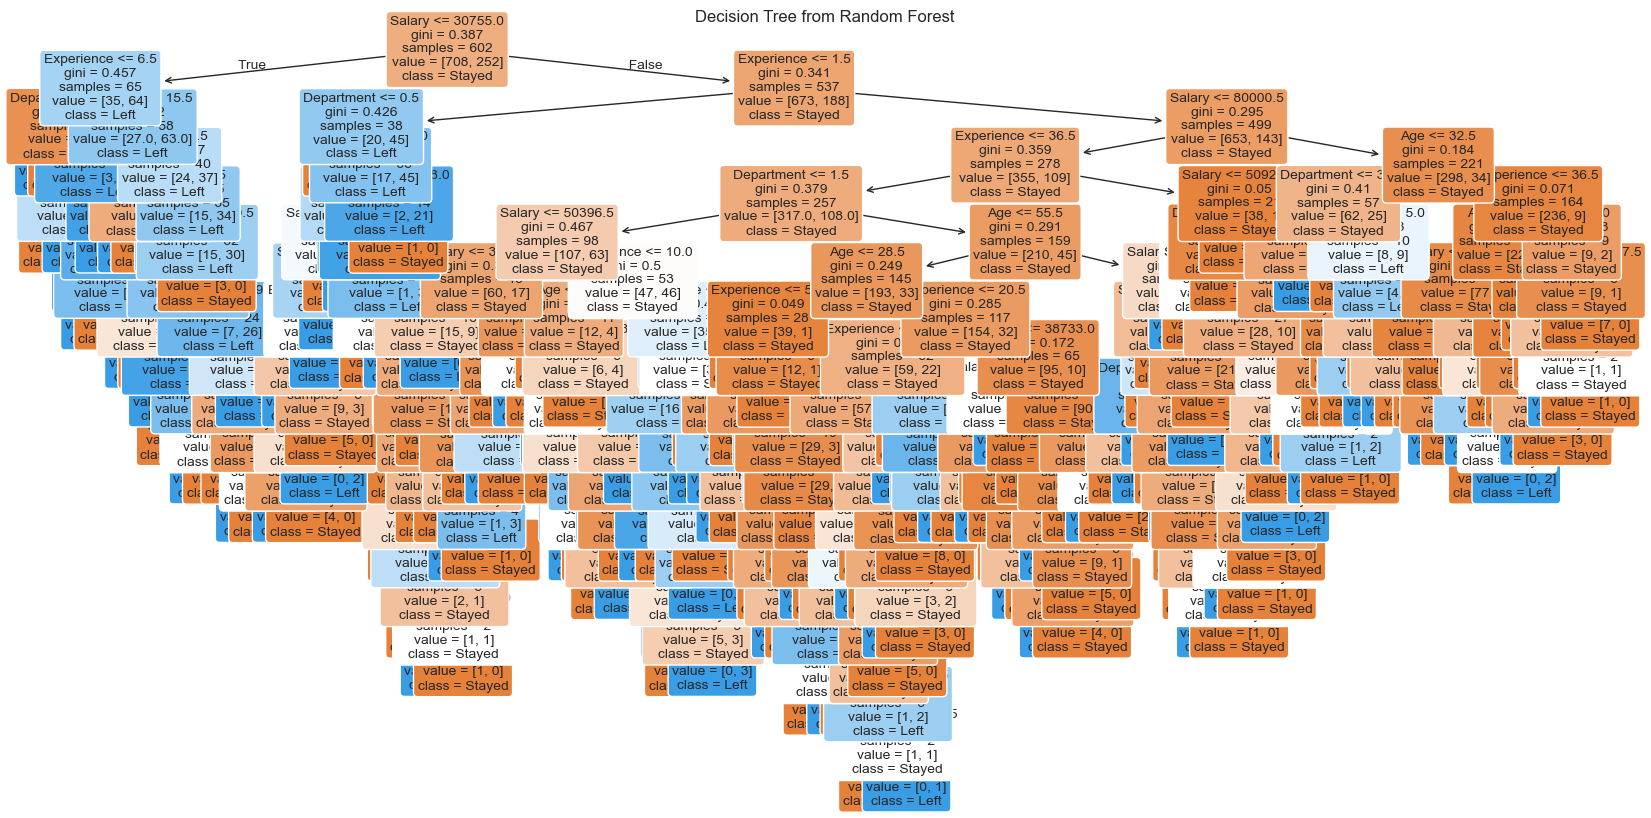

In [35]:
from sklearn.tree import plot_tree

feature_names = ['Age', 'Salary', 'Department', 'Experience']

plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0],
          feature_names=feature_names,
          class_names=["Stayed", "Left"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()


## Model 4: XGBoost (Extreme Gradient Boosting)
XGBoost is a powerful machine learning algorithm based on gradient boosting that builds trees sequentially to correct previous errors.
It is known for its speed, accuracy, and ability to prevent overfitting, making it popular in real-world and competitive ML tasks.

In [61]:

from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classifier Results:")
print("Training Accuracy :", xgb_model.score(X_train, y_train))
print("Testing Accuracy  :", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Classifier Results:
Training Accuracy : 0.9802083333333333
Testing Accuracy  : 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       184
           1       0.45      0.34      0.39        56

    accuracy                           0.75       240
   macro avg       0.63      0.61      0.62       240
weighted avg       0.73      0.75      0.74       240

Confusion Matrix:
 [[161  23]
 [ 37  19]]


#### Testing upon custom input from user

In [62]:
feature_names = ['Age', 'Salary', 'Department', 'Experience']
print("Enter details to predict whether the employee will leave or not:")
print("Department Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

user_input = []
for feature in feature_names:
    val = float(input(f"Enter {feature}: ")) if feature != 'Department' else int(input(f"Enter Department (as per mapping): "))
    user_input.append(val)

input_df = pd.DataFrame([user_input], columns=feature_names)

pred_class = xgb_model.predict(input_df)[0]
pred_prob = xgb_model.predict_proba(input_df)[0]

print("\nPrediction Result:")
print(f"Predicted Class       : {'Left Company (1)' if pred_class == 1 else 'Stayed (0)'}")
print(f"Probability of Leaving: {pred_prob[1]:.2f}")
print(f"Probability of Staying: {pred_prob[0]:.2f}")


Enter details to predict whether the employee will leave or not:
Department Mapping: {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4}


Enter Age:  47
Enter Salary:  60000
Enter Department (as per mapping):  0
Enter Experience:  22



Prediction Result:
Predicted Class       : Stayed (0)
Probability of Leaving: 0.17
Probability of Staying: 0.83


## Model 5: Naive Bayes
Naive Bayes is a simple and fast classification algorithm based on Bayes' Theorem, assuming features are independent.
It works well for text data and spam detection, and performs surprisingly well even with limited data.

In [63]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)


In [64]:

nb_acc = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", nb_acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7958333333333333

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       184
           1       0.64      0.29      0.40        56

    accuracy                           0.80       240
   macro avg       0.73      0.62      0.64       240
weighted avg       0.77      0.80      0.76       240

Confusion Matrix:
[[175   9]
 [ 40  16]]


#### Testing upon custom input from user

In [59]:
feature_names = ['Age', 'Salary', 'Department', 'Experience']
print("Enter details to predict whether the employee will leave or not:")
print("Department Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

user_input = []

for feature in feature_names:
    
    val = float(input(f"Enter {feature}: "))
    user_input.append(val)

input_df = pd.DataFrame([user_input], columns=feature_names)

pred_class = nb_model.predict(input_df)[0]
pred_prob = nb_model.predict_proba(input_df)[0]

print("\nPrediction Result:")
print(f"Predicted Class       : {'Left Company (1)' if pred_class == 1 else 'Stayed (0)'}")
print(f"Probability of Leaving: {pred_prob[1]:.2f}")
print(f"Probability of Staying: {pred_prob[0]:.2f}")


Enter details to predict whether the employee will leave or not:
Department Mapping: {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4}


Enter Age:  39
Enter Salary:  82000
Enter Department:  4
Enter Experience:  20



Prediction Result:
Predicted Class       : Stayed (0)
Probability of Leaving: 0.14
Probability of Staying: 0.86


## 8) Model Comparison Table and conclusion

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost', 'Naive Bayes']
model_preds = [y_pred_logreg, y_pred_knn, y_pred_rf, y_pred_xgb, y_pred_nb] 

accuracies = []
precisions = []
recalls = []
f1_scores = []

for y_pred in model_preds:
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='binary'))
  
    recalls.append(recall_score(y_test, y_pred, average='binary'))
    f1_scores.append(f1_score(y_test, y_pred, average='binary'))

comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})


comparison_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)


,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.800000,0.605263,0.410714,0.489362
1,Naive Bayes,0.795833,0.640000,0.285714,0.395062
2,Logistic Regression,0.783333,0.833333,0.089286,0.161290
3,KNN,0.766667,0.500000,0.321429,0.391304
4,XGBoost,0.750000,0.452381,0.339286,0.387755


### Conclusion

After evaluating multiple machine learning algorithms on the employee attrition dataset, we observe that:

 Random Forest performs the best overall with the highest accuracy (80%) and the best F1-Score (0.489), indicating a good balance between precision and recall. This makes it the most reliable model for predicting employee attrition in this case.

 Naive Bayes comes close with 79.58% accuracy, and it slightly outperforms Random Forest in precision, but suffers from a lower recall (28.57%). It’s fast and effective, but may miss many true positives.

 Logistic Regression shows very high precision (83.33%) but extremely low recall (8.9%), meaning it is too conservative and fails to identify most employees who actually left the company.

 K-Nearest Neighbors (KNN) gives a decent tradeoff with 76.67% accuracy and moderate recall, but it underperforms compared to ensemble models.

 XGBoost, surprisingly, lags behind in this scenario with 75% accuracy and the lowest precision and F1-score, which might be due to the small dataset size or sub-optimal tuning.
